In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

import os

bpl=pd.read_csv('C:\\Users\\USER\\Downloads\\bpl db\\bpl.csv')
bowler=pd.read_csv('C:\\Users\\USER\\Downloads\\bpl db\\bowler.csv')
batsman=pd.read_csv('C:\\Users\\USER\\Downloads\\bpl db\\batsman.csv')


In [59]:
bpl.head()
bowler.head()

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
0,0,2011/12,Final,Feb 29 2012,Mashrafe Mortaza,2.0,0,17,0,8.50,0,0
1,0,2011/12,Final,Feb 29 2012,Azhar Mahmood,2.0,0,25,0,12.50,0,1
2,32,2011/12,1st,Feb 10 2012,Yasir Arafat,4.0,0,33,2,8.25,2,0
3,29,2011/12,4th,Feb 11 2012,Syed Rasel,3.0,0,33,0,11.00,2,0
4,28,2011/12,5th,Feb 12 2012,Dwayne Bravo,4.0,0,34,1,8.50,3,1


In [60]:
bpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               311 non-null    int64  
 1   season           311 non-null    object 
 2   match_no         311 non-null    object 
 3   date             311 non-null    object 
 4   team_1           311 non-null    object 
 5   team_1_score     311 non-null    object 
 6   team_2           311 non-null    object 
 7   team_2_score     311 non-null    object 
 8   player_of_match  311 non-null    object 
 9   toss_winner      311 non-null    object 
 10  toss_decision    311 non-null    object 
 11  winner           311 non-null    object 
 12  venue            311 non-null    object 
 13  city             311 non-null    object 
 14  win_by_wickets   311 non-null    int64  
 15  win_by_runs      311 non-null    int64  
 16  result           311 non-null    object 
 17  umpire_1        

In [61]:
bowler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3601 non-null   int64  
 1   season       3601 non-null   object 
 2   match_no     3601 non-null   object 
 3   date         3601 non-null   object 
 4   player_name  3601 non-null   object 
 5   O            3601 non-null   float64
 6   M            3601 non-null   int64  
 7   R            3601 non-null   int64  
 8   W            3601 non-null   int64  
 9   ECON         3601 non-null   float64
 10  WD           3601 non-null   int64  
 11  NB           3601 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 337.7+ KB


In [62]:

print(f"Number of samples = {bpl.shape[0]+bowler.shape[0]+batsman.shape[0]}")
print(f"Number of categories = {bpl.shape[1]+bowler.shape[1]+batsman.shape[1]}")



Number of samples = 8960
Number of categories = 44


In [63]:
bpl.describe()

,id,win_by_wickets,win_by_runs,Unnamed: 19
count,311.000000,311.000000,311.000000,0.0
mean,284.755627,3.186495,15.627010,NaN
std,228.051532,3.449723,24.626548,NaN
min,0.000000,0.000000,0.000000,NaN
25%,57.500000,0.000000,0.000000,NaN
50%,230.000000,2.000000,0.000000,NaN
75%,513.500000,6.000000,23.000000,NaN
max,719.000000,10.000000,119.000000,NaN


In [64]:
# data processing and cleaning
bpl['team_1'].value_counts()


team_1
Chittagong Vikings        28
Dhaka Dynamites           28
Rangpur Riders            27
Khulna Titans             24
Comilla Victorians        23
Rajshahi Kings            16
Dhaka Gladiators          15
Sylhet Sixers             15
Barisal Bulls             14
Khulna Royal Bengals      14
Chattogram Challengers    13
Chittagong Kings          12
Barisal Burners           11
Duronto Rajshahi          10
Sylhet Royals             10
Dhaka Platoon              9
Sylhet Thunder             9
Rangpur Rangers            6
Khulna Tigers              6
Rajshahi Royals            5
Cumilla Warriors           4
Fortune Barishal           4
Minister Group Dhaka       3
Sylhet Sunrisers           3
Sylhet Super Stars         2
Name: count, dtype: int64

In [65]:
bpl['team_2'].value_counts()


team_2
Rangpur Riders            38
Comilla Victorians        34
Dhaka Dynamites           24
Rajshahi Kings            23
Chittagong Vikings        19
Khulna Tigers             14
Khulna Titans             14
Duronto Rajshahi          14
Chittagong Kings          13
Barisal Burners           13
Sylhet Royals             13
Dhaka Gladiators          11
Rajshahi Royals           10
Barisal Bulls             10
Chattogram Challengers     9
Khulna Royal Bengals       8
Sylhet Sixers              8
Cumilla Warriors           8
Sylhet Super Stars         8
Rangpur Rangers            6
Dhaka Platoon              4
Sylhet Thunder             3
Minister Group Dhaka       3
Fortune Barishal           2
Sylhet Sunrisers           2
Name: count, dtype: int64

In [66]:
bpl['winner'].value_counts()


winner
Victorians     37
Riders         35
Dynamites      30
Dhaka          21
Royals         21
Kings          18
Vikings        17
Titans         16
Chittagong     13
Challengers    12
Rajshahi       12
Bulls          12
Tigers         12
Barisal        11
Sixers          9
Khulna          8
Platoon         7
Rangers         5
Warriors        4
Barishal        4
Super           3
Match           2
Thunder         1
Sunrisers       1
Name: count, dtype: int64

In [67]:
bpl['toss_winner'].value_counts()


toss_winner
Rangpur Riders            34
Comilla Victorians        27
Dhaka Dynamites           25
Rajshahi Kings            22
Khulna Titans             21
Chittagong Vikings        21
Dhaka Gladiators          15
Khulna Tigers             13
Barisal Burners           13
Sylhet Royals             12
Khulna Royal Bengals      12
Sylhet Sixers             11
Duronto Rajshahi          11
Barisal Bulls             11
Chittagong Kings          10
Rajshahi Royals            9
Chattogram Challengers     8
Cumilla Warriors           8
Rangpur Rangers            6
Sylhet Super Stars         5
Sylhet Thunder             5
Fortune Barishal           4
Dhaka Platoon              3
Minister Group Dhaka       3
Sylhet Sunrisers           2
Name: count, dtype: int64

In [68]:
bpl[bpl['winner'] == 'NaN']


,id,season,match_no,date,team_1,team_1_score,team_2,team_2_score,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,Unnamed: 19


In [69]:
all_teams = {
    "Dhaka": ['Dhaka Dynamites', 'Dhaka Platoon', 'Minister Group Dhaka', 'Dhaka Gladiators'], 
    "Chittagong": ['Chattogram Challengers', 'Chittagong Vikings', 'Chittagong Kings'],
    "Barishal": ['Fortune Barishal', 'Barisal Burners', 'Barisal', 'Barishal', 'Barisal Bulls'],
    "Sylhet": ['Sylhet Sunrisers', 'Sylhet Royals', 'Sylhet Sixers', 'Sylhet Super Stars', 'Sylhet Thunder'],
    "Rajshahi": ['Rajshahi Kings', 'Rajshahi Royals', 'Duronto Rajshahi'],
    "Comilla": ['Comilla Victorians', 'Cumilla Warriors'],
    "Khulna": ['Khulna Titans', 'Khulna Royal Bengals', 'Khulna Tigers'],
    "Rangpur": ['Rangpur Rangers', 'Rangpur Riders']    
}
for k, v in all_teams.items():
    for name in v:
        bpl['team_1'].replace(name, k, inplace = True)
        bpl['team_2'].replace(name, k, inplace = True)
        bpl['toss_winner'].replace(name, k, inplace = True)
        # winner ...
        for n in name.split(' '):
            bpl['winner'].replace(n, k, inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_1616\985063896.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bpl['team_1'].replace(name, k, inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_1616\985063896.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [70]:
bpl['winner'].value_counts()


winner
Chittagong    60
Dhaka         58
Comilla       41
Rangpur       40
Khulna        36
Sylhet        35
Barishal      27
Rajshahi      12
Match          2
Name: count, dtype: int64

In [71]:
bpl['player_of_match'].value_counts()


player_of_match
Shakib Al Hasan           11
Mahmudullah                9
Chris Gayle                7
Mushfiqur Rahim            7
Shahid Afridi              7
                          ..
Jason Roy                  1
Saqlain Sajib              1
Shivnarine Chanderpaul     1
Peter Trego                1
Mohammad Sami              1
Name: count, Length: 135, dtype: int64

In [72]:
all_umpires = pd.concat([bpl['umpire_1'], bpl['umpire_2']])

umpire_match_count = all_umpires.value_counts()

print(umpire_match_count)

Masudur Rahman            63
Ranmore Martinesz         59
Mahfuzur Rahman           57
Sharfuddoula              45
Nadir Shah                37
Tanvir Ahmed              36
Enamul Haque              35
Gazi Sohel                34
Jeremy Lloyds             33
Prageeth Rambukwella      26
Anisur Rahman             26
Morshed Ali Khan          22
Riazuddin                 21
Alex Wharf                19
Khalid Mahmood            18
David Millns              18
David Orchard             16
Richard Illingworth       14
Shozab Raza                7
Ahsan Raza                 7
Rashid Riaz                3
Akteruzzaman               2
D Milns                    2
Khalid Mahmud              2
Moniruzzaman               2
Nahidul Islam              1
Abdul Mazid                1
Dawid Malan                1
Minhajul Abedin Afridi     1
Habibur Rahman             1
Nayeem Hasan               1
Najmul Hossain Shanto      1
Amit Kumar                 1
Mehidy Hasan Miraz         1
Bishawnath Hal

In [73]:
bpl['toss_winner'].value_counts()


toss_winner
Dhaka         46
Khulna        46
Rajshahi      42
Rangpur       40
Chittagong    39
Sylhet        35
Comilla       35
Barishal      28
Name: count, dtype: int64

In [74]:
bpl['team_1'].value_counts()


team_1
Dhaka         55
Chittagong    53
Khulna        44
Sylhet        39
Rangpur       33
Rajshahi      31
Barishal      29
Comilla       27
Name: count, dtype: int64

In [75]:
bpl['team_2'].value_counts()


team_2
Rajshahi      47
Rangpur       44
Comilla       42
Dhaka         42
Chittagong    41
Khulna        36
Sylhet        34
Barishal      25
Name: count, dtype: int64

In [76]:
bpl.head()

,id,season,match_no,date,team_1,team_1_score,team_2,team_2_score,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,Unnamed: 19
0,0,2011/12,Final,Feb 29 2012,Barishal,140/7,Dhaka,144/2,Imran Nazir,Dhaka,field first,Dhaka,"Shere Bangla National Stadium, Mirpur",Mirpur,8,0,8 wickets,David Orchard,Enamul Haque,NaN
1,30,2011/12,3rd,Feb 11 2012,Khulna,175/5,Dhaka,156/7,Andre Russell,Khulna,bat first,Khulna,"Shere Bangla National Stadium, Mirpur",Mirpur,0,19,19 runs,Jeremy Lloyds,Sharfuddoula,NaN
2,26,2011/12,7th,Feb 13 2012,Barishal,125,Khulna,131/3,Dwayne Smith,Khulna,field first,Khulna,"Shere Bangla National Stadium, Mirpur",Mirpur,7,0,7 wickets,Enamul Haque,Jeremy Lloyds,NaN
3,29,2011/12,4th,Feb 11 2012,Barishal,180/2,Rajshahi,158/9,Ahmed Shehzad,Barishal,bat first,Barishal,"Shere Bangla National Stadium, Mirpur",Mirpur,0,22,22 runs,David Orchard,Gazi Sohel,NaN
4,28,2011/12,5th,Feb 12 2012,Khulna,171/3,Chittagong,174/4,Nasir Jamshed,Khulna,bat first,Chittagong,"Shere Bangla National Stadium, Mirpur",Mirpur,6,0,6 wickets,David Orchard,Enamul Haque,NaN


In [77]:
bpl[['team_1_run','team_1_wicket']] = bpl.team_1_score.str.split('/',expand=True)
bpl["team_1_wicket"].fillna(0, inplace = True)
bpl['team_1_wicket'] = pd.to_numeric(bpl['team_1_wicket'])
bpl['team_1_run'] = pd.to_numeric(bpl['team_1_run'])


bpl[['team_2_run','team_2_wicket']] = bpl.team_2_score.str.split('/',expand=True)
bpl["team_2_wicket"].fillna(0, inplace = True)
bpl['team_2_wicket'] = pd.to_numeric(bpl['team_2_wicket'])
bpl['team_2_run'] = pd.to_numeric(bpl['team_2_run'])

bpl.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_1616\1825103545.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bpl["team_1_wicket"].fillna(0, inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_1616\1825103545.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

,id,season,match_no,date,team_1,team_1_score,team_2,team_2_score,player_of_match,toss_winner,...,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,Unnamed: 19,team_1_run,team_1_wicket,team_2_run,team_2_wicket
0,0,2011/12,Final,Feb 29 2012,Barishal,140/7,Dhaka,144/2,Imran Nazir,Dhaka,...,8,0,8 wickets,David Orchard,Enamul Haque,NaN,140,7,144,2
1,30,2011/12,3rd,Feb 11 2012,Khulna,175/5,Dhaka,156/7,Andre Russell,Khulna,...,0,19,19 runs,Jeremy Lloyds,Sharfuddoula,NaN,175,5,156,7
2,26,2011/12,7th,Feb 13 2012,Barishal,125,Khulna,131/3,Dwayne Smith,Khulna,...,7,0,7 wickets,Enamul Haque,Jeremy Lloyds,NaN,125,0,131,3
3,29,2011/12,4th,Feb 11 2012,Barishal,180/2,Rajshahi,158/9,Ahmed Shehzad,Barishal,...,0,22,22 runs,David Orchard,Gazi Sohel,NaN,180,2,158,9
4,28,2011/12,5th,Feb 12 2012,Khulna,171/3,Chittagong,174/4,Nasir Jamshed,Khulna,...,6,0,6 wickets,David Orchard,Enamul Haque,NaN,171,3,174,4


In [78]:
bpl.drop('team_1_score', axis = 1, inplace = True)
bpl.drop('team_2_score', axis = 1, inplace = True)

In [79]:
# data analysis for bpl dataset
bpl.head(3)

,id,season,match_no,date,team_1,team_2,player_of_match,toss_winner,toss_decision,winner,...,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,Unnamed: 19,team_1_run,team_1_wicket,team_2_run,team_2_wicket
0,0,2011/12,Final,Feb 29 2012,Barishal,Dhaka,Imran Nazir,Dhaka,field first,Dhaka,...,8,0,8 wickets,David Orchard,Enamul Haque,NaN,140,7,144,2
1,30,2011/12,3rd,Feb 11 2012,Khulna,Dhaka,Andre Russell,Khulna,bat first,Khulna,...,0,19,19 runs,Jeremy Lloyds,Sharfuddoula,NaN,175,5,156,7
2,26,2011/12,7th,Feb 13 2012,Barishal,Khulna,Dwayne Smith,Khulna,field first,Khulna,...,7,0,7 wickets,Enamul Haque,Jeremy Lloyds,NaN,125,0,131,3


In [80]:
bpl.shape

(311, 22)

In [81]:
bpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               311 non-null    int64  
 1   season           311 non-null    object 
 2   match_no         311 non-null    object 
 3   date             311 non-null    object 
 4   team_1           311 non-null    object 
 5   team_2           311 non-null    object 
 6   player_of_match  311 non-null    object 
 7   toss_winner      311 non-null    object 
 8   toss_decision    311 non-null    object 
 9   winner           311 non-null    object 
 10  venue            311 non-null    object 
 11  city             311 non-null    object 
 12  win_by_wickets   311 non-null    int64  
 13  win_by_runs      311 non-null    int64  
 14  result           311 non-null    object 
 15  umpire_1         311 non-null    object 
 16  umpire_2         311 non-null    object 
 17  Unnamed: 19     

In [82]:
bpl.describe()

,id,win_by_wickets,win_by_runs,Unnamed: 19,team_1_run,team_1_wicket,team_2_run,team_2_wicket
count,311.000000,311.000000,311.000000,0.0,311.000000,311.000000,311.000000,311.000000
mean,284.755627,3.186495,15.627010,NaN,154.733119,5.450161,140.254019,4.019293
std,228.051532,3.449723,24.626548,NaN,32.516837,2.613228,30.119811,3.054285
min,0.000000,0.000000,0.000000,NaN,44.000000,0.000000,45.000000,0.000000
25%,57.500000,0.000000,0.000000,NaN,135.000000,4.000000,125.500000,1.000000
50%,230.000000,2.000000,0.000000,NaN,156.000000,6.000000,142.000000,4.000000
75%,513.500000,6.000000,23.000000,NaN,176.000000,7.000000,160.000000,7.000000
max,719.000000,10.000000,119.000000,NaN,239.000000,9.000000,222.000000,9.000000


In [83]:
bpl[bpl['win_by_wickets'] >= 9]


,id,season,match_no,date,team_1,team_2,player_of_match,toss_winner,toss_decision,winner,...,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,Unnamed: 19,team_1_run,team_1_wicket,team_2_run,team_2_wicket
6,32,2011/12,1st,Feb 10 2012,Sylhet,Barishal,Chris Gayle,Barishal,field first,Barishal,...,10,0,10 wickets,Anisur Rahman,David Orchard,NaN,165,4,167,0
19,342,2016/17,4th,Nov 9 2016,Chittagong,Rangpur,Mohammad Shahzad,Rangpur,field first,Rangpur,...,9,0,9 wickets,Khalid Mahmood,Nadir Shah,NaN,124,0,125,1
20,341,2016/17,5th,Nov 10 2016,Khulna,Rangpur,Shahid Afridi,Rangpur,field first,Rangpur,...,9,0,9 wickets,Mahfuzur Rahman,Ranmore Martinesz,NaN,44,0,45,1
33,329,2016/17,17th,Nov 18 2016,Comilla,Rangpur,Mohammad Shahzad,Rangpur,field first,Rangpur,...,9,0,9 wickets,Ranmore Martinesz,Tanvir Ahmed,NaN,122,5,126,1
40,316,2016/17,30th,Nov 27 2016,Rangpur,Chittagong,Tamim Iqbal,Rangpur,bat first,Chittagong,...,9,0,9 wickets,Nadir Shah,Ranmore Martinesz,NaN,124,6,128,1
63,540,2018/19,6th,Jan 8 2019,Comilla,Rangpur,Mashrafe Mortaza,Rangpur,field first,Rangpur,...,9,0,9 wickets,Mahfuzur Rahman,Ranmore Martinesz,NaN,63,0,67,1
106,55,2018/19,41st,Feb 2 2019,Comilla,Rangpur,Ravi Bopara,Comilla,bat first,Rangpur,...,9,0,9 wickets,Minhajul Abedin Afridi,Sanjit Saha,NaN,72,0,76,1
117,223,2015/16,11th,Nov 27 2015,Rangpur,Comilla,Marlon Samuels,Comilla,field first,Comilla,...,9,0,9 wickets,Mahfuzur Rahman,Masudur Rahman,NaN,82,0,84,1
120,219,2015/16,15th,Dec 1 2015,Chittagong,Rangpur,Soumya Sarkar,Chittagong,bat first,Rangpur,...,9,0,9 wickets,Enamul Haque,Sharfuddoula,NaN,111,8,113,1
121,218,2015/16,16th,Dec 1 2015,Dhaka,Barishal,Evin Lewis,Barishal,field first,Barishal,...,9,0,9 wickets,Enamul Haque,Ranmore Martinesz,NaN,158,5,159,1


In [84]:
bpl[bpl['win_by_runs'] >= 100]


,id,season,match_no,date,team_1,team_2,player_of_match,toss_winner,toss_decision,winner,...,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,Unnamed: 19,team_1_run,team_1_wicket,team_2_run,team_2_wicket
70,541,2018/19,5th,Jan 8 2019,Dhaka,Khulna,Hazratullah Zazai,Khulna,field first,Dhaka,...,0,105,105 runs,Alex Wharf,Nadir Shah,NaN,192,6,87,0
140,644,2019/20,2nd,Dec 11 2019,Comilla,Rangpur,Dasun Shanaka,Comilla,bat first,Comilla,...,0,105,105 runs,Masudur Rahman,Tanvir Ahmed,NaN,173,7,68,0
276,115,2012/13,32nd,Feb 8 2013,Chittagong,Sylhet,Brendan Taylor,Sylhet,field first,Chittagong,...,0,119,119 runs,Gazi Sohel,Richard Illingworth,NaN,193,4,74,0


In [85]:
import os

file_path = r'C:\Users\USER\Downloads\bpl db\bpl.csv'
file_path2 = r'C:\Users\USER\Downloads\bpl db\bowler.csv'
file_path3 = r'C:\Users\USER\Downloads\bpl db\batsman.csv'

size = 0  # Initialize size variable

# Check if the first file exists and add its size
if os.path.isfile(file_path):
    file_size_bytes = os.path.getsize(file_path)
    size += file_size_bytes / (1024 ** 3)  # Convert bytes to GB

# Check if the second file exists and add its size
if os.path.isfile(file_path2):
    file_size_bytes = os.path.getsize(file_path2)
    size += file_size_bytes / (1024 ** 3)  # Convert bytes to GB

# Check if the third file exists and add its size
if os.path.isfile(file_path3):
    file_size_bytes = os.path.getsize(file_path3)
    size += file_size_bytes / (1024 ** 3)  # Convert bytes to GB

# Print the total size if the files exist
if size > 0:
    print(f"Total file size: {size:.6f} GB")
else:
    print("No files found. Please check the file paths.")


Total file size: 0.000599 GB


In [86]:
                                           #  Intelligence Questions For Winning Prediction

Dhaka  23
Khulna  19
Comilla  19
Rangpur  19
Chittagong  18
Barishal  15
Sylhet  15
Rajshahi  5


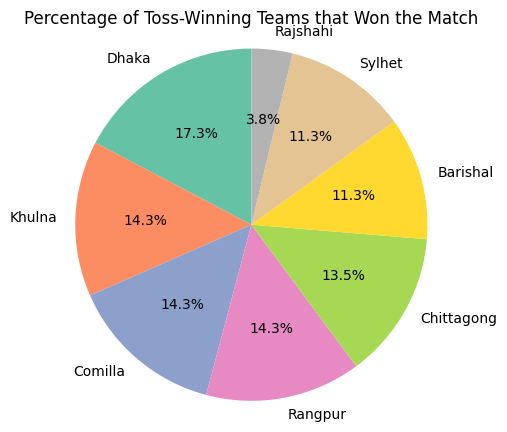

In [87]:
                                          # How many matches a team wins that wins the toss?

toss_and_match_winner = bpl[bpl['toss_winner'] == bpl['winner']]

toss_win_count = toss_and_match_winner['toss_winner'].value_counts().reset_index()
toss_win_count.columns = ['team', 'count']

for index, row in toss_win_count.iterrows():
    print(f"{row['team']}  {row['count']}")

toss_win_count = toss_and_match_winner['toss_winner'].value_counts()

# Calculate the total number of such wins for percentage purposes
total_toss_wins = toss_win_count.sum()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(toss_win_count, labels=toss_win_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))


plt.title('Percentage of Toss-Winning Teams that Won the Match')

plt.axis('equal')

plt.show()

Dhaka 45
Chittagong 10
Barishal 0
Sylhet 0
Rajshahi 0
Comilla 0
Khulna 2
Rangpur 0


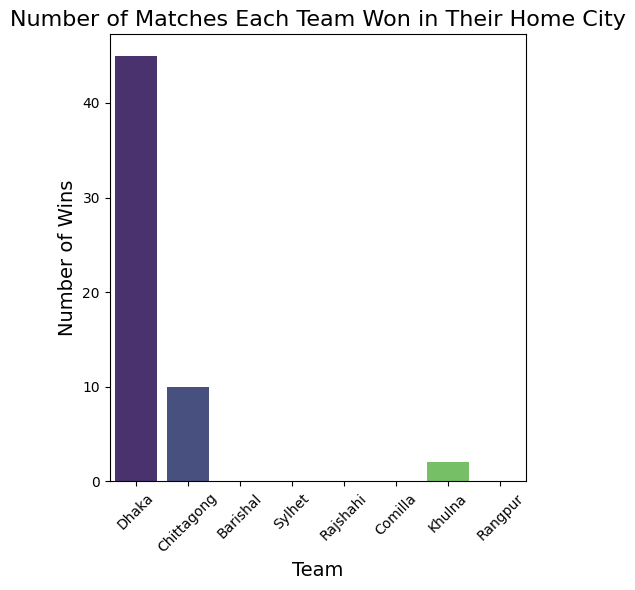

In [88]:
                             #How many matches did a team win when the team played in its own city?
home_cities = {
    "Dhaka": "Mirpur",
    "Chittagong": "Chittagong",
    "Barishal": "Barishal",
    "Sylhet": "Sylhet",
    "Rajshahi": "Rajshahi",
    "Comilla": "Comilla",
    "Khulna": "Khulna",
    "Rangpur": "Rangpur"
}

home_city_wins = {}

for team, city in home_cities.items():
    home_wins = bpl[(bpl['winner'] == team) & (bpl['city'] == city)]
    
    home_city_wins[team] = len(home_wins)

for team, wins in home_city_wins.items():
    print(f"{team} {wins}")

df_home_city_wins = pd.DataFrame(list(home_city_wins.items()), columns=['Team', 'Wins'])

plt.figure(figsize=(5, 6))
sns.barplot(x='Team', y='Wins', hue='Team', data=df_home_city_wins, palette="viridis", legend=False)

plt.title('Number of Matches Each Team Won in Their Home City', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Total Wins for Each Team Across All Seasons:
         team  total_wins
0  Chittagong          60
1       Dhaka          58
2     Comilla          41
3     Rangpur          40
4      Khulna          36
5      Sylhet          35
6    Barishal          27
7    Rajshahi          12
8       Match           2


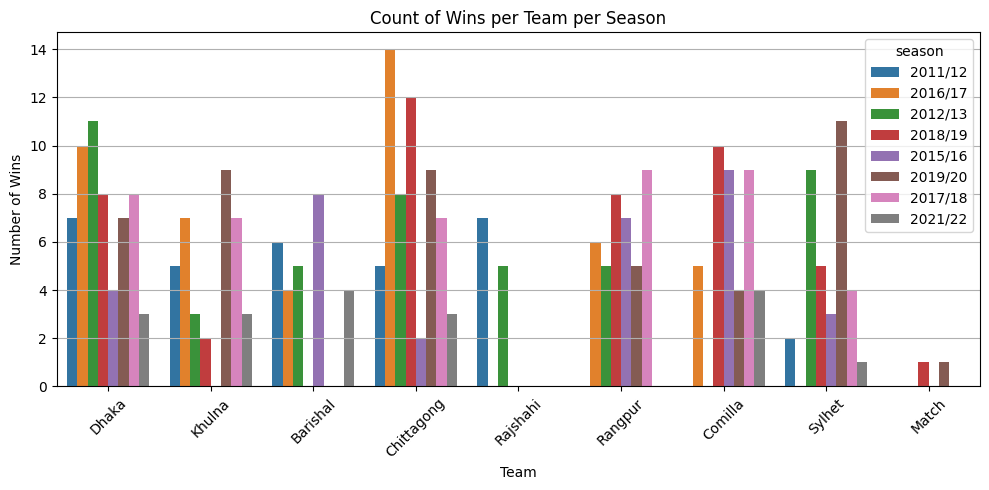

C:\Users\USER\AppData\Local\Temp\ipykernel_1616\2051766345.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_wins', y='team', data=total_wins, palette="viridis", legend=False)


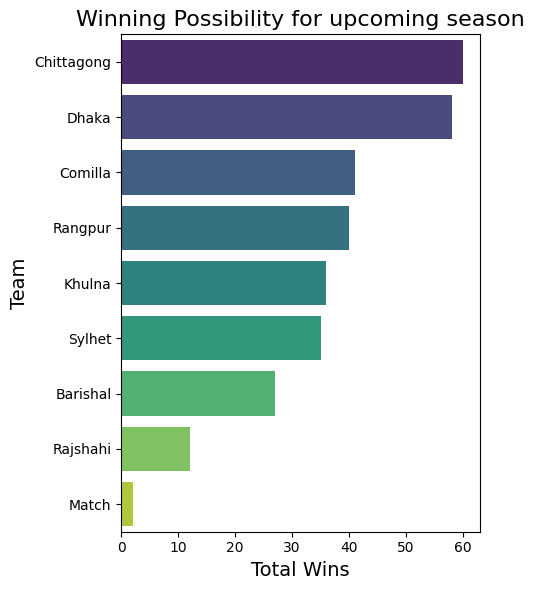

In [89]:
      # what is the possibility of a team can win the highest probability for upcoming season based on previous winning record?

season_winners = bpl.groupby(['season', 'winner']).size().reset_index(name='wins')


total_wins = bpl['winner'].value_counts().reset_index()
total_wins.columns = ['team', 'total_wins']

print("\nTotal Wins for Each Team Across All Seasons:")
print(total_wins)


plt.figure(figsize=(10, 5))
sns.countplot(x='winner', data=bpl, hue="season")
plt.grid(axis='y')
plt.title('Count of Wins per Team per Season')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(5, 6))
sns.barplot(x='total_wins', y='team', data=total_wins, palette="viridis", legend=False)
plt.title('Winning Possibility for upcoming season', fontsize=16)
plt.xlabel('Total Wins', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.tight_layout()
plt.show()

Model accuracy: 53.97%


C:\Users\USER\AppData\Local\Temp\ipykernel_1616\1495760840.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Win Probability', data=df_probabilities, palette='viridis')


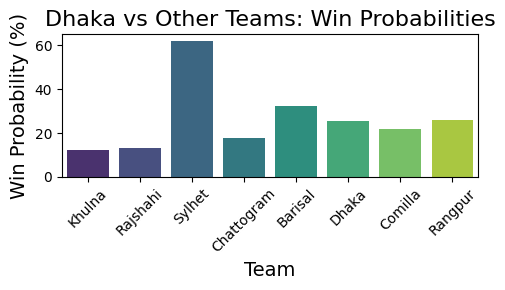

In [90]:
              # How can team dhaka win next match with other teams based on data set such as venue, toss winning, toss decision?

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score



bpl['date'] = pd.to_datetime(bpl['date'], errors='coerce')
bpl = bpl.dropna(subset=['winner', 'team_1', 'team_2', 'toss_winner', 'toss_decision', 'venue'])

features = ['team_1', 'team_2', 'toss_winner', 'toss_decision', 'venue']
target = 'winner'

all_teams = pd.concat([bpl['team_1'], bpl['team_2']]).unique()
all_features = pd.concat([bpl[features[0]], bpl[features[1]], bpl[features[2]], bpl[features[3]], bpl[features[4]]]).unique()

team_name_mapping = pd.Series(all_teams).to_dict()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)  # Handle unknown categories during prediction
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Prepare the data
X = bpl[features]
y = bpl[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

accuracy = accuracy_score(y_test, pipeline.predict(X_test))
print(f"Model accuracy: {accuracy * 100:.2f}%")

teams = all_teams  


dhaka_encoded = preprocessor.transform(pd.DataFrame([{'team_1': 'Dhaka', 'team_2': 'Dhaka', 'toss_winner': 'Dhaka', 'toss_decision': 'bat', 'venue': 'Mirpur'}]))

predictions = {}
for team in teams:
    if team != 'Dhaka':
        # Create a test match scenario
        next_match = {
            'team_1': 'Dhaka',
            'team_2': team,
            'toss_winner': 'Dhaka',  
            'toss_decision': 'bat',  
            'venue': 'Mirpur' 
        }
        next_match_df = pd.DataFrame([next_match])
        
        # Predict Dhaka's chance of winning
        match_encoded = preprocessor.transform(next_match_df)
        win_probability = pipeline.named_steps['classifier'].predict_proba(match_encoded)[:, 1]  
        predictions[team] = win_probability[0]

team_probabilities = {
    'Khulna': 12.33,
    'Rajshahi': 13.17,
    'Sylhet': 62.00,
    'Chattogram': 17.73,
    'Barisal': 32.50,
    'Dhaka': 25.43,
    'Comilla': 22.00,
    'Rangpur': 26.00
}

for team, prob in predictions.items():
    team_name = team_name_mapping[team] if team in team_name_mapping else team


prediction_df = pd.DataFrame(list(predictions.items()), columns=['Team', 'Win Probability'])
prediction_df['Team'] = prediction_df['Team'].map(team_name_mapping)

df_probabilities = pd.DataFrame(list(team_probabilities.items()), columns=['Team', 'Win Probability'])

plt.figure(figsize=(5, 3))
sns.barplot(x='Team', y='Win Probability', data=df_probabilities, palette='viridis')
plt.title('Dhaka vs Other Teams: Win Probabilities', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Win Probability (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:

uni =pd.unique(bpl.values.ravel())
uni2=pd.unique(batsman.values.ravel())
uni3=pd.unique(bowler.values.ravel())
# for item in uni:
#     print(item)
print(uni.size+uni2.size+uni3.size)

4438


In [53]:



bowler_file = r'C:\Users\USER\Downloads\bpl db\bowler.csv'
bowler_df = pd.read_csv(bowler_file)


bowler_df['Wickets_Standardized'] = (bowler_df['W'] - bowler_df['W'].min()) / (bowler_df['W'].max() - bowler_df['W'].min())
bowler_df['Economy_Standardized'] = (bowler_df['ECON'].max() - bowler_df['ECON']) / (bowler_df['ECON'].max() - bowler_df['ECON'].min())
bowler_df['Maidens_Standardized'] = (bowler_df['M'] - bowler_df['M'].min()) / (bowler_df['M'].max() - bowler_df['M'].min())


bowler_df['Performance_Score'] = (bowler_df['Wickets_Standardized'] * 0.5 + 
                                  bowler_df['Economy_Standardized'] * 0.3 +
                                  bowler_df['Maidens_Standardized'] * 0.2)


best_bowler = bowler_df[['player_name', 'W', 'ECON', 'M', 'Performance_Score']].sort_values(by='Performance_Score', ascending=False).head(1)

# Print the best bowler
print(best_bowler)


     player_name  W  ECON  M  Performance_Score
3287  Wahab Riaz  5  2.18  1           0.792444


id              int64
season         object
match_no       object
date           object
player_name    object
comment        object
R              object
B              object
M              object
fours          object
sixs           object
SR             object
dtype: object


TypeError: unsupported operand type(s) for -: 'str' and 'str'